# Data Cleaning

## Introduction
In this section we will go through the data analytics process of Data Cleaning.

To skip directly to to particular parts, use the following links:
1. **[Libraries / Reading Data](#libraries_reading-data)**
2. **[Data-Overview / Statistical Key Figures](#overview)**
3. **[Formatting / Standardizing Data](#formatting_standardizing)**
4. **[Handle Missing Data](#handle_missing)**
5. **[Handle Duplicates](#handle_duplicates)**
6. **[Handle Outliers](#handle_outliers)**
7. **[Save The Cleaned Dataframe](#saving_df)**



<a id="libraries_reading-data"></a>
## 1. Libraries / Reading Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [321]:
df = pd.read_csv("../../data/raw_data.csv")
df.head(10)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
5,6,104000,Technology,Bill Gates,67.0,United States,Medina,Microsoft,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
6,7,94500,Media & Entertainment,Michael Bloomberg,81.0,United States,New York,Bloomberg LP,Media & Entertainment,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
7,8,93000,Telecom,Carlos Slim Helu & family,83.0,Mexico,Mexico City,Telecom,Telecom,Mexico,...,3.6,"$1,258,286,717,125",40.2,105.8,75.0,13.1,55.1,1.260140e+08,23.634501,-102.552784
8,9,83400,Diversified,Mukesh Ambani,65.0,India,Mumbai,Diversified,Diversified,India,...,7.7,"$2,611,000,000,000",28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880
9,10,80700,Technology,Steve Ballmer,67.0,United States,Hunts Point,Microsoft,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891


<a id="overview"></a>
## 2. Data-Overview / Statistical Key Figures

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [323]:
df.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


<a id="formatting_standardizing"></a>
## 3. Formatting / Standardizing Data

In [324]:
# Keep column identifiers consistent
df = df.rename(
    columns={
        'finalWorth': 'final_worth_usd',
        'personName': 'person_name', 'countryOfCitizenship': 'country_of_citizenship', 'selfMade': 'wealth_source',
        'birthDate': 'birth_date',
        'lastName': 'last_name',
        'firstName': 'first_name',
        'residenceStateRegion': 'residence_state_region', 'birthYear': 'birth_year',
        'birthMonth': 'birth_month',
        'birthDay': 'birth_day',
        'gdp_country': 'gdp_country_usd',
        'gross_tertiary_education_enrollment': 'gross_tertiary_education_enrollment_country'
        , 'tax_revenue_country_country': 'tax_revenue_country_usd'
    }
)

In [325]:
# Dict for replacing bool values in the 'wealth_source' column for better clarity
replace_dict = {
    True: 'Self-Made',
    False: 'Inherited/Unearned'
}
df['wealth_source'] = df['wealth_source'].replace(replace_dict)

In [1]:
# Convert 'gdp_country_in_dollars' from str to numeric after removing '$' and commas
df['gdp_country_usd'] = pd.to_numeric(
    df['gdp_country_usd'].str.strip('$ ').
    str.replace(',', '')
)

NameError: name 'pd' is not defined

<a id="handle_missing"></a>
## 4. Handle missing data

##### Check for zero values first (they could indicate missing data).
-> There aren't any; Otherwise, if there would be numeric columns with zeros, this should get checked, and if it's related to missing data, you can replace them with NaN's to handle them in the following like other potential NaN-values

In [327]:
(df == 0).sum()

rank                                           0
final_worth_usd                                0
category                                       0
person_name                                    0
age                                            0
country                                        0
city                                           0
source                                         0
industries                                     0
country_of_citizenship                         0
organization                                   0
wealth_source                                  0
status                                         0
gender                                         0
birth_date                                     0
last_name                                      0
first_name                                     0
title                                          0
date                                           0
state                                          0
residence_state_regi

In [328]:
# Function to get an overview of the missing data per column
def get_missing_data_rate(input_df: pd.DataFrame):
    total = input_df.isna().sum().sort_values(ascending=False)
    percent = (input_df.isna().sum() / input_df.isna().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Missing Data Total', 'Missing Data Percent'])
    return missing_data

In [329]:
get_missing_data_rate(df)

,Missing Data Total,Missing Data Percent
organization,2315,0.876894
title,2301,0.871591
residence_state_region,1893,0.717045
state,1887,0.714773
cpi_change_country,184,0.069697
cpi_country,184,0.069697
tax_revenue_country_usd,183,0.069318
total_tax_rate_country,182,0.068939
life_expectancy_country,182,0.068939
gross_tertiary_education_enrollment_country,182,0.068939


##### Select only relevant features for the specific analysis project + drop columns when more than 15 % of the data is missing

In [330]:
filtered_df = df[['rank', 'final_worth_usd', 'person_name',
                  # 'source', ''country_of_citizenship'', 'organization',''last_name'', ''first_name'',
                  'age', 'country', 'city', 'industries', 'wealth_source', 'gender',
                  #'status', 'birth_date'', 'title', 'state', 'residenceStateRegion', 'birthYear', 'date', 'category'
                  #''birth_month'', ''birth_day'', 'cpi_country', 'cpi_change_country',
                  'life_expectancy_country',
                  #'tax_revenue_country_country',
                  #'latitude_country', 'longitude_country'
                  'gross_tertiary_education_enrollment_country', 'gross_primary_education_enrollment_country',
                  'gdp_country_usd', 'total_tax_rate_country', 'population_country'
                  ]]

In [331]:
get_missing_data_rate(filtered_df)

,Missing Data Total,Missing Data Percent
life_expectancy_country,182,0.068939
gross_tertiary_education_enrollment_country,182,0.068939
total_tax_rate_country,182,0.068939
gross_primary_education_enrollment_country,181,0.068561
gdp_country_usd,164,0.062121
population_country,164,0.062121
city,72,0.027273
age,65,0.024621
country,38,0.014394
rank,0,0.000000


##### There are a few options to handle remaining missing data:
You can just drop the remaining rows with missing data. Or you could fill the NaN-entries for categorical columns with the modus, and for numerical columns with mean/median of the specific column to avoid data-loss (if the dataset is small). You can work with mean if the data is not skewed (no outliers). Otherwise, you'd choose median as the NaN-fill-option because it's robust against outliers. To avoid biased data, you just drop the remaining rows with missing data here

In [332]:
# Check rows with missing data
filtered_df[filtered_df.isna().any(axis=1)]

,rank,final_worth_usd,person_name,age,country,city,industries,wealth_source,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country
32,33,38000,Li Ka-shing,94.0,Hong Kong,NaN,Diversified,Self-Made,M,NaN,NaN,NaN,NaN,NaN,NaN
46,47,29500,Lee Shau Kee,95.0,Hong Kong,Hong Kong,Real Estate,Self-Made,M,NaN,NaN,NaN,NaN,NaN,NaN
85,86,18900,Eyal Ofer,72.0,Monaco,Monte Carlo,Diversified,Inherited/Unearned,M,NaN,NaN,NaN,7.184844e+09,NaN,38964.0
107,108,15800,Karl Albrecht Jr. & family,NaN,Germany,NaN,Fashion & Retail,Inherited/Unearned,M,80.9,70.2,104.0,3.845630e+12,48.8,83132799.0
108,108,15800,Beate Heister,NaN,NaN,NaN,Fashion & Retail,Inherited/Unearned,F,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,2540,1000,Réal Plourde,NaN,Canada,Westmount,Fashion & Retail,Self-Made,M,81.9,68.9,100.9,1.736426e+12,24.5,36991981.0
2610,2540,1000,Vera Rechulski Santo Domingo,74.0,Bermuda,NaN,Food & Beverage,Inherited/Unearned,F,NaN,NaN,NaN,NaN,NaN,NaN
2626,2540,1000,Masaru Wasami,77.0,NaN,NaN,Logistics,Self-Made,M,NaN,NaN,NaN,NaN,NaN,NaN
2629,2540,1000,Toto Wolff,51.0,Monaco,NaN,Sports,Self-Made,M,NaN,NaN,NaN,7.184844e+09,NaN,38964.0


In [333]:
# Drop remaining NaN-Enry rows
filtered_df = filtered_df.dropna(axis=0)

In [334]:
# Check the last time if there's no missing data left
filtered_df.isna().sum().max()

0

<a id="handle_duplicates"></a>
## 5. Handle Duplicates

In [335]:
# Check for exact duplicated rows in the df
filtered_df.loc[filtered_df.duplicated()]

,rank,final_worth_usd,person_name,age,country,city,industries,wealth_source,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country


In [336]:
# Check for feature-specific duplicated rows 
filtered_df.loc[filtered_df.duplicated(subset=['person_name', 'country'])]

,rank,final_worth_usd,person_name,age,country,city,industries,wealth_source,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country
2112,2020,1400,Wang Yanqing & family,76.0,China,Weihai,Manufacturing,Inherited/Unearned,F,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09
2317,2259,1200,Li Li,59.0,China,Shenzhen,Healthcare,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09


In [337]:
# Check the feature-specific duplicates
filtered_df.query('person_name == "Li Li" or person_name.str.startswith("Wang Yanqing")')

,rank,final_worth_usd,person_name,age,country,city,industries,wealth_source,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country
785,766,3700,Wang Yanqing & family,56.0,China,Wuxi,Manufacturing,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09
1045,1027,2900,Li Li,57.0,China,Changsha,Healthcare,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09
2112,2020,1400,Wang Yanqing & family,76.0,China,Weihai,Manufacturing,Inherited/Unearned,F,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09
2317,2259,1200,Li Li,59.0,China,Shenzhen,Healthcare,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09


Then you can either drop the duplicated rows or maintain them (if data loss would be a consequence).
In this case, for 'Wang Yanqing & family' the two entries which probably don't belong to the same person, because the gender and age entry is slightly different. For 'Li Li' the age differs as well in the two rows. -> Ensured for both cases they aren't about duplicated data that should get dropped.
Just for demonstration purposes how dropping the potentially column-specific duplicated rows could get dropped:

In [338]:
filtered_df_no_duplicates = filtered_df.loc[~filtered_df.duplicated(subset=['person_name', 'country'])] \
    .reset_index(drop=True).copy()

In [339]:
# Check if dropping worked properly
filtered_df_no_duplicates.query('person_name == "Li Li" or person_name.str.startswith("Wang Yanqing")')

,rank,final_worth_usd,person_name,age,country,city,industries,wealth_source,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country
731,766,3700,Wang Yanqing & family,56.0,China,Wuxi,Manufacturing,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09
971,1027,2900,Li Li,57.0,China,Changsha,Healthcare,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09


<a id="handle_outliers"></a>
## 6. Handle outliers

Usually you can check for outliers through a boxplot related to the specific numerical (x) and a dependent categorical (y) feature;
But this type of dataset is very susceptible to outliers because of the wide range of billionaires' wealth 

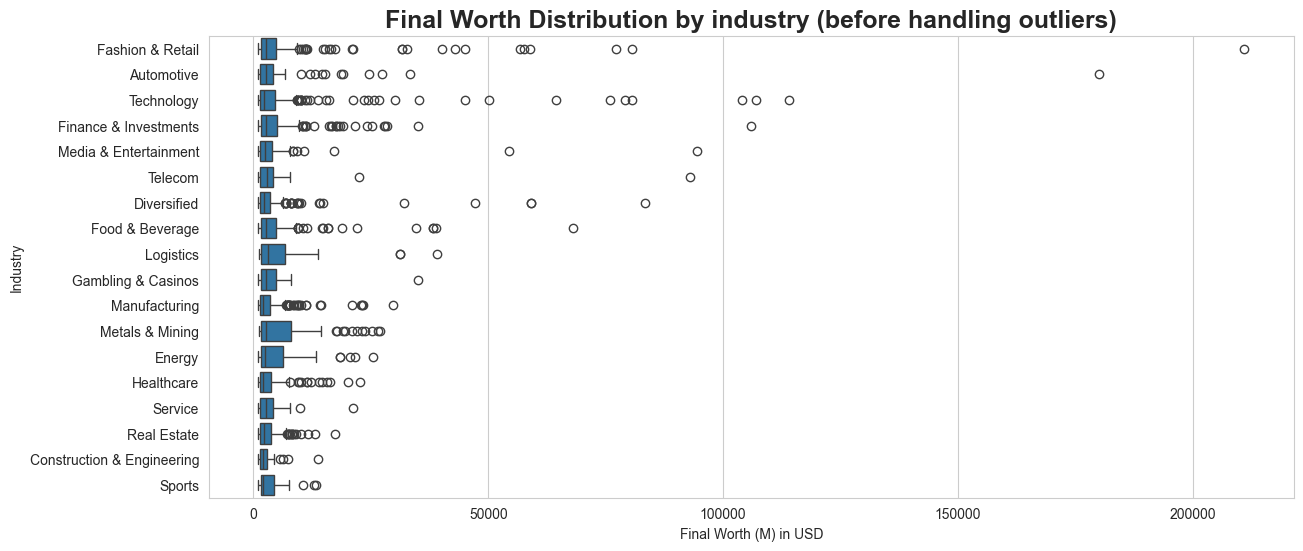

In [340]:
plt.figure(figsize=(14, 6))
boxplot = sns.boxplot(data=filtered_df, x='final_worth_usd', y='industries')
boxplot.set(xlabel='Final Worth (M) in USD', ylabel='Industry')
plt.title(label="Final Worth Distribution by industry (before handling outliers)", fontsize=18, fontweight='bold')
plt.show()

To demonstrate, how handling outliers could be done, you define a threshold that gets multiplied by the standard deviation of the related column (The higher the threshold, the stricter the filter criteria); Then you check if there are entries above this threshold, and drop them for instance. Otherwise, you could handle them just like mentioned above the missing data (replacing with column's median/mean). 

In [341]:
threshold = 3 * filtered_df['final_worth_usd'].std()
condition = (filtered_df['final_worth_usd'] > threshold)
# Use boolean indexing to select rows that don't match the condition
filtered_df_outliers_handled = filtered_df.loc[~condition]

It's important to mention that there is definitely not the one right way to handle outliers for every scenario. Its really project-specific and must be thought out. Outliers can also be very valuable data, where just dropping them could lead to biased data. 

In [342]:
# Check if there are any outliers left based on dropping-condition
filtered_df_outliers_handled.loc[condition]

,rank,final_worth_usd,person_name,age,country,city,industries,wealth_source,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country


As shown, the data is now less widely dispersed and there are way less outliers than before

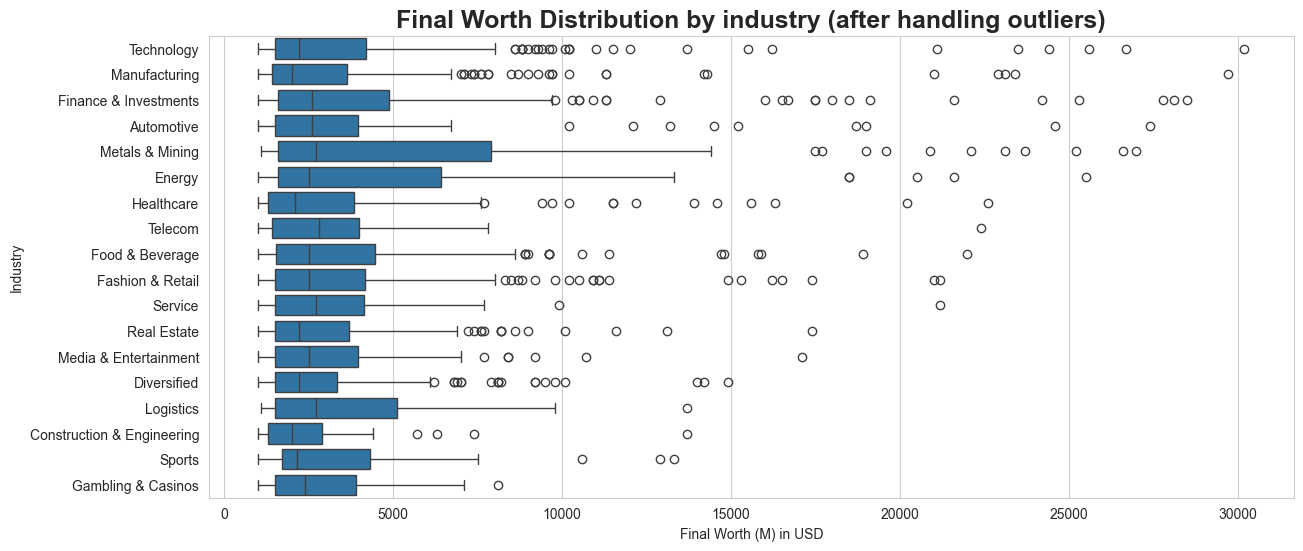

In [343]:
plt.figure(figsize=(14, 6))
boxplot = sns.boxplot(data=filtered_df_outliers_handled, x='final_worth_usd', y='industries')
boxplot.set(xlabel='Final Worth (M) in USD', ylabel='Industry')
plt.title(label="Final Worth Distribution by industry (after handling outliers)", fontsize=18, fontweight='bold')
plt.show()

<a id="saving_df"></a>
## 7. Save The Cleaned Dataframe

For future EDA, you should use the original filtered df (without outlier handling), because outliers aren't systematic data errors here that could influence our analysis in a bad way; they are a valuable part of the overall df.

In [344]:
filtered_df.to_csv("../../data/cleaned_data.csv", index=False)

In [345]:
filtered_df_outliers_handled.to_csv("../../data/cleaned_data_outliers_handled.csv", index=False)